In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os, shutil
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint

plt.style.use('seaborn-darkgrid')

In [3]:
abspath = os.path.abspath('.')
imagepath = os.path.join(abspath, 'images/')
word_list = ('rain', 'cloud', 'sunrise', 'shine')

train_dir = os.path.join('data_dir', 'train')
test_dir = os.path.join('data_dir', 'test')
valid_dir = os.path.join('data_dir', 'valid')

In [4]:
os.listdir(train_dir)

['sunrise', 'cloud', 'shine', 'rain']

In [5]:
# Check the number of picture for each type of weather 

def pic_count(word):
    pictures = [file.count(word) for file in os.listdir(imagepath) if file.startswith(word)]
    return len(pictures)

for word in word_list:
    print(f'{word} has : {pic_count(word)} pictures')

rain has : 215 pictures
cloud has : 300 pictures
sunrise has : 357 pictures
shine has : 253 pictures


In [6]:
""" split the data form the image file into the train,
test, valid for each individual weather type file"""

# # cloud pictures
# fname_cloud = [file for file in os.listdir(imagepath) if file.startswith('cloud')]
# for fname in fname_cloud[:240]:
#     src  = os.path.join(imagepath, fname)
#     dst = os.path.join('train/train_cloud', fname)
#     shutil.copyfile(src, dst)
    
# for fname in fname_cloud[240:270]:
#     src  = os.path.join(imagepath, fname)
#     dst = os.path.join('test/test_cloud', fname)
#     shutil.copyfile(src, dst)

# for fname in fname_cloud[270:300]:
#     src  = os.path.join(imagepath, fname)
#     dst = os.path.join('valid/valid_cloud', fname)
#     shutil.copyfile(src, dst)

# # rain pictures
# fname_rain = [file for file in os.listdir(imagepath) if file.startswith('rain')]
# for fname in fname_rain[:172]:
#     src  = os.path.join(imagepath, fname)
#     dst = os.path.join('train', 'train_rain', fname)
#     shutil.copyfile(src, dst)
    
# for fname in fname_rain[172:194]:
#     src  = os.path.join(imagepath, fname)
#     dst = os.path.join('test/test_rain', fname)
#     shutil.copyfile(src, dst)
    
# for fname in fname_rain[194:215]:
#     src  = os.path.join(imagepath, fname)
#     dst = os.path.join('valid/valid_rain', fname)
#     shutil.copyfile(src, dst)
    
# # shine pictures
# fname_shine = [file for file in os.listdir(imagepath) if file.startswith('shine')]
# for fname in fname_shine[:202]:
#     src  = os.path.join(imagepath, fname)
#     dst = os.path.join('train/train_shine', fname)
#     shutil.copyfile(src, dst)
    
# for fname in fname_shine[202:226]:
#     src  = os.path.join(imagepath, fname)
#     dst = os.path.join('test/test_shine', fname)
#     shutil.copyfile(src, dst)
    
# for fname in fname_shine[226:253]:
#     src  = os.path.join(imagepath, fname)
#     dst = os.path.join('valid/valid_shine', fname)
#     shutil.copyfile(src, dst)

# # sunrise pictures
# fname_sunrise = [file for file in os.listdir(imagepath) if file.startswith('sunrise')]
# for fname in fname_sunrise[:285]:
#     src  = os.path.join(imagepath, fname)
#     dst = os.path.join('train/train_sunrise', fname)
#     shutil.copyfile(src, dst)
    
# for fname in fname_sunrise[286:321]:
#     src  = os.path.join(imagepath, fname_sunrise[i])
#     dst = os.path.join('test/test_sunrise', fname)
#     shutil.copyfile(src, dst)
    
# for fname in fname_sunrise[321:357]:
#     src  = os.path.join(imagepath, fname_sunrise[i])
#     dst = os.path.join('valid/valid_sunrise', fname)
#     shutil.copyfile(src, dst)

' split the data form the image file into the train,\ntest, valid for each individual weather type file'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


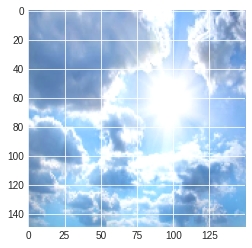

In [7]:
image_file = os.path.join('data_dir/train/shine/', 'shine69.jpg')
img = load_img(image_file, target_size=(150, 150, 3))
img = img_to_array(img)
img /=225

plt.imshow(img)

In [8]:
train_gen = ImageDataGenerator(rescale=1./225) # generate batches of training images 
test_gen = ImageDataGenerator(rescale=1./225) 

train_data = train_gen.flow_from_directory(train_dir, target_size=(150, 150),
                                           batch_size=32, class_mode='categorical')

valid_data = test_gen.flow_from_directory(valid_dir, target_size=(150, 150),
                                          batch_size=10, class_mode='categorical')

test_data = test_gen.flow_from_directory(test_dir, target_size=(150, 150), class_mode='categorical')

Found 899 images belonging to 4 classes.
Found 114 images belonging to 4 classes.
Found 111 images belonging to 4 classes.


In [9]:
model = models.Sequential()

# layer 1
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# layer 2
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3)))

# layer 3
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3)))

# layer 4
model.add(layers.Flatten())
model.add(layers.Dense(715, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 128)       7

In [10]:
checkpoint = ModelCheckpoint(filepath='weather.model.hdf5', save_best_only=True, verbose=1)

model.compile(optimizer=RMSprop(lr=0.0001), loss=categorical_crossentropy, metrics=['accuracy'])

history = model.fit(train_data, steps_per_epoch=10, epochs=20, verbose=1,
                    validation_data=valid_data, callbacks=checkpoint)

Epoch 1/20
10/10 [==============================] - 39s 4s/step - loss: 1.3608 - accuracy: 0.3630 - val_loss: 1.0369 - val_accuracy: 0.5088

Epoch 00001: val_loss improved from inf to 1.03688, saving model to weather.model.hdf5
Epoch 2/20
10/10 [==============================] - 41s 4s/step - loss: 1.0761 - accuracy: 0.4580 - val_loss: 0.7897 - val_accuracy: 0.5614

Epoch 00002: val_loss improved from 1.03688 to 0.78971, saving model to weather.model.hdf5
Epoch 3/20
10/10 [==============================] - 40s 4s/step - loss: 0.8711 - accuracy: 0.6133 - val_loss: 0.7031 - val_accuracy: 0.5877

Epoch 00003: val_loss improved from 0.78971 to 0.70306, saving model to weather.model.hdf5
Epoch 4/20
10/10 [==============================] - 41s 4s/step - loss: 0.8310 - accuracy: 0.5902 - val_loss: 0.6413 - val_accuracy: 0.7719

Epoch 00004: val_loss improved from 0.70306 to 0.64134, saving model to weather.model.hdf5
Epoch 5/20
10/10 [==============================] - 38s 4s/step - loss: 0.67

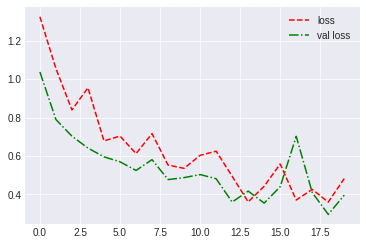

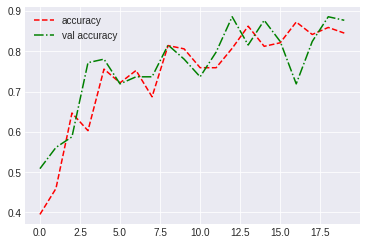

In [11]:
epochs = len(history.history['loss'])

loss = history.history['loss']
acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

plt.plot(loss, 'r--', label='loss')
plt.plot(val_loss, 'g-.', label='val loss')
plt.legend()

plt.figure()
plt.plot(acc, 'r--', label='accuracy')
plt.plot(val_acc, 'g-.', label='val accuracy')
plt.legend()
plt.show()

In [12]:
score = model.evaluate(test_data, callbacks=checkpoint)

print(f'Test loss:{score[0]}\n Test accuracy:{score[1]}')

4/4 [==============================] - 4s 822ms/step - loss: 0.4396 - accuracy: 0.8649
Test loss:0.43964841961860657
 Test accuracy:0.8648648858070374


In [15]:
image_file = os.path.join('data_dir/train/rain/', 'rain135.jpg')

def predict(image_file):
    '''This function predicts the class of the given image, 
    by first preprocessing the image into tensor of the right shape
    and normalizing the image.
    '''
    
    img = load_img(image_file, target_size=(150, 150))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 225
    
    prediction = model.predict(img, verbose=0,
                               callbacks=checkpoint) # makes prediction and returns a list of predictions
    class_pred = np.argmax(prediction) # gets the highest number in the list of prediction 
    pred = prediction[0, class_pred] * 100

    # this gets the class name from the class_indices dict
    # the train_data.class_indices is a dictionary that show how the classes are mapped
    name = ''.join([key for key, value in train_data.class_indices.items() if class_pred == value])

    print(prediction)
    print(f'Prediction:{name}, Accuracy:{pred:1f}')

predict(image_file)

[[0.05128598 0.5535483  0.11689183 0.27827397]]
Prediction:rain, Accuracy:55.354828
